**Alumno: Perez Hernandez Hector**

# Modelo Conceptual


## Objetivo de estudio

Ya que Acoculco es un area potencial para ser un campo geotermico con fines para la produccion de energia electrica, esta debe ser estudiada para determinar su taza de enfriamiento, gradiente geotermico y rasgos geologicos. Los campos geotermicos suelen tener rapida evolucion ya sea de modo geologico natural o de manera fisica, por explotacion o por procesos geologicos. Si el campo se enfria demasiado rapido su potencial geotermico es bajo lo cual se refleja en un bajo interes de explotacion. Por lo que el objetivo del estudio es determinar su potencial geotermico mediante el desarrollo de un modelo 1D que simula la distribucion tiempo - profundidad de la temperatura.

## Localizacion 

Acoculco es un area localizada el estado de Puebla, Mexico. Donde se han realizado dos pozos, uno muy cerca del otro, el primero localizado en 19 ° 55′16.30″ N   98 ° 08′34.85″ W

Acoculco se encuentra alojado en un complejo de caldera volcanica que se extiende sobre e limite del estado de Puebla - Hidalgo y forma parte del Cinturon Volcanico Trans - Mexicano. El complejo tiene 18 km de diametro y aproximadamente 900 m de profundidad

## Caracteristicas del pozo

Se cuenta principalmente con dos pozos de estudio, el primero realizado como un pozo exploratorio hecho por la Comision Federal de Eectricidad en 1995 llamado Pozo EAC - 1 el cual alcanzo profundidades de 1810 m y e segundo pozo perforado en 2008 llamado Pozo EAC - 2 acanzando una profundidad de 1900 m. 

El pozo EAC-1 alcanzo una temperatura de 307°C lo cual representa un gradiente geotermico de $ \frac{140° C}{1000 m} $ lo que indica un regimen de transferencia de calor conductivo puro. 



## Procesos estudiados 

Se genera el estudio mediante diversos procesos, los cuales son 

**Numerico**: Con el cual se evalua la evolucion de la actividad geotermica, el tiempo y la distribucion de tempertura espacial, mediante el proceso de diferencias finitas. 

**Medidas de radiocarbono** Con el objetivo de datar muestras mediante la espectrometria de centelleo liquido. 

**Realizacion de perfiles termicos** El primer perfil definido por la inclusion de fluidos de los valores de Th en el cual la variacion por temperatua no es lineal. El segundo perfil se obtuvo mediante los registros termicos de pozo.

**Explosiones hidrotermales** Se estudian los accidentes geograficos relacionados con explosiones hidrotermales con la finalidad de datarlos mediante radiocarbono. 

# Modelo Matematico

Se utiliza a ecuacion de transferencia de calor por conduccion pura.


$$\frac{\partial T}{\partial t} = D_{th} \frac{\partial^2 T}{\partial z} $$

$$ D_{th} = \frac{\kappa}{\rho c} $$

**T** = Temperatura en funcion del tiempo y profundidad. 

$D_{th}$ = Difusiviad termica la cual tambien es dependiente de la profundiad

**z** = es la profundidad

**k** = Conductividad termica

$\rho$ = densidad de masa de los estratos

**c** = capacidad calorifica especifica

Las propiedades termicas de la roca fueron tomadas de la literatura (Eppelbaum et al., 2014) y la densidad de masa volumetrica fue tomada de las muestras de los nucleos de pozo mediante el metodo de desplaamiento de agua.

## Condiciones de frontera

El modelo toma 15°C en la superficie y 750°C en su punto mas profundo (4000 m) informacion tomada de la extrapoacion dada la informacion proporcionada por EAC-1 y la datacion radiocarbono por espectrometria de centelleo liquido. 



Las curvas se extrapolaron hasta 4000 m mediante el gradiente geotermico ya que los pozos EAC-1 y EAC-2 solo lograron llegar a 1810 m y 1900 m de profundidad. 

#### Gradiente de temperatura
El gradiente es la variacion de una magnitud en funcion de una distancia, en este caso la magnitud es la temperatura y esta en funcion de la distancia del medio en e cual se propaga la energia. 
$$ q^"_{ x}=-k\frac{T_2-T_1}{L}=k\frac{\Delta{T}}{L} $$
Donde 
$$ q_{x} (W) $$
representa a transferencia de calor por conduccion.


# Modelo Computacional No Estacionario


Datos del problema 
   depth1  depth2     k     cp     rho
0       0      50  1.84  840.0  2120.0
1      50     250  1.41  840.0  2340.0
2     250     400  1.36  840.0  2300.0
3     400     600  1.44  840.0  2300.0
4     600     800  1.46  840.0  2290.0
5     800    1000  1.68  840.0  2700.0
6    1000    1500  1.84  890.0  2700.0
7    1500    1900  1.66  890.0  2360.0
8    1900    4000  2.10  950.0  2760.0

 Dth : 
0    1.033243e-06
1    7.173382e-07
2    7.039337e-07
3    7.453416e-07
4    7.589936e-07
5    7.407407e-07
6    7.657095e-07
7    7.903257e-07
8    8.009153e-07
dtype: float64

Datos para la solución numérica usando FD
 dx =       40.0 [m] 
 L  =     4000.0 [m] 
 N  =       99
 dt = 31536000.0 [s] 
 NT =   250000

Usamos un factor de aceleración debido al método implícito: 
 SP =          1000 (factor)
 dt =   31536000000.0 [s] 
 NT =           250 (pasos totales)

z shape = (101,) 
[   0.   40.   80.  120.  160.  200.  240.  280.  320.  360.  400.  440.
  480.  520.  560.

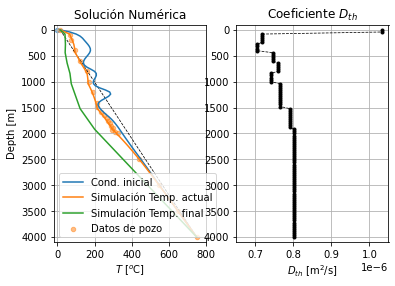

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Jul 15 12:05:57 2020

@author: luiggi
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from fdm_1D import Laplaciano1D_NS, calcDth, interpTemp
"""
Definicion de las variables z_dat y T_dat
Importacion de las funciondes desde fdm_1D
"""
z_dat = 0
T_dat = 0
#
# Datos físicos del problema
#
"""
Condiciones de frontera de Temperatura, superficial de 15°C y en el fondo 750°C
L = a la profundidad maxima
"""
Ttop = 15   # Temperatura en la superficie
Tbot = 750  # Temperatura a 4000 m
L = 4000.0  # Profundidad máxima
"""
Importacion de datos desde el archivo .csv
"""
data = pd.read_csv('phys_dat.csv') # Lectura de datos: k, cp, rho
Dth_data = data['k'] / (data['rho']*data['cp']) # Cálculo del coeficiente Dth

print('\nDatos del problema \n{}'.format(data))
print('\n Dth : \n{}'.format(Dth_data))
#input('Presiona <enter>')
#
# Datos para la solución numérica por diferencias finitas
#
N = 99                      # Número de incógnitas
dx = L / (N+1)              # Distancia entre nodos
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad
dt = 3600*24*365 # Paso de tiempo (seconds per year)
NT = 250000      # Número total de pasos de tiempo

print('\nDatos para la solución numérica usando FD')
print(' dx = {:10.1f} [m] \n L  = {:10.1f} [m] \n N  = {:8d}'.format(dx, L, N))
print(' dt = {:10.1f} [s] \n NT = {:8d}'.format(dt, NT))
#
# Aceleración para el método implícito
#
SP = 1000
dt *= SP
NT /= SP
print('\nUsamos un factor de aceleración debido al método implícito: ')
print(' SP = {:13d} (factor)\n dt = {:15.1f} [s] \n NT = {:13d} (pasos totales)'.format(SP, dt, int(NT)))
print('\nz shape = {} \n{}'.format(z.shape,z))
#input('Presiona <enter>')
#
# Vector con el valor del coeficiente dependiendo de la profundidad 
#
"""
Importacion de las funcion Dth desde fdm_1D
"""
Dth = calcDth(Dth_data, z, N)
        
print('\nCoeficiente en los puntos de la simulación: \n D_th shape = {} \n{}'.format(Dth.shape, Dth))
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
"""
Importacion de las funcion tck desde fdm_1D
"""
tck_1 = interpTemp(z_dat, T_dat)

T_ini = interpolate.splev(z, tck_1, der = 0)
#
# Temperaturas actuales
z_dat_now = [0, 96, 192, 389, 596, 798, 1000, 1197, 1408, 1495, 1586, 1649, 1702, 1750, 1803, 1851, 1904, 1942, 1967, 2000, 2500, 3000, 3500, 4000]
T_dat_now = [15, 69, 74, 95, 121, 159, 168, 192, 213, 213, 236, 251, 267, 272, 284, 288, 298, 293, 310, 325, 440, 550, 650, 750]
# Interpolación a los lugares de la simulación
tck_2 = interpolate.splrep(z_dat_now, T_dat_now, s = 0)
T_final = interpolate.splev(z, tck_2, der = 0)
#
# SOLUCIÓN USANDO DIFERENCIAS FINITAS
#
# Definicion del sistema lineal de N x N
#
dt_dx2 = dt / dx**2
gamma = Dth * dt_dx2
A = Laplaciano1D_NS(N, gamma) # Matriz del sistema

print('\nGamma shape = {}, A shape = {}'.format(gamma.shape, A.shape))
#
# Ciclo de solución temporal
#
T_new = T_ini.copy()
T_now = np.zeros(N+2)
for i in range(0, int(NT)+1):
    print(i)
    T_new[ 1] += gamma[0] * T_ini[0]
    T_new[-2] += gamma[-1] * T_ini[-1]    
    T_new[1:-1] = np.linalg.solve(A,T_new[1:-1])
    if (i == 7):
        T_now = T_new.copy() # Temperatura actual
#
# GRAFICACIÓN
#
ax1 = plt.subplot(121)
plt.plot([T_ini[0], T_ini[-1]], [z[0], z[-1]], '--', lw=0.75, c='k' )
plt.scatter(T_dat, z_dat, s=20, alpha=0.5)
plt.plot(T_ini, z, '-', lw = 1.5, label='Cond. inicial')
plt.scatter(T_dat_now, z_dat_now, s=20, alpha=0.5, label='Datos de pozo')
plt.plot(T_now, z, label='Simulación Temp. actual')
plt.plot(T_new,z, label='Simulación Temp. final')
plt.ylim(4100,-100)
plt.xlim(-20,800)
plt.title('Solución Numérica')
plt.xlabel('$T$ [$^o$C]')
plt.ylabel('Depth [m]')
plt.grid()
plt.legend()

ax2 = plt.subplot(122, sharey=ax1)
plt.plot(Dth, z, 'k.--', lw=0.75)
plt.xlabel('$D_{th}$ [m$^2$/s]')
plt.xlim(0.65e-6,1.05e-6)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title('Coeficiente $D_{th}$')
plt.grid()

plt.subplots_adjust(hspace=1.0)

plt.show()